In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

###
df1 = pd.read_csv(r'C:\Users\talia\Downloads/Life Expectancy Data.csv')
df1

Each row represent a population of 1000 people

__Country__  -  dummy variable

__Year__  - from 2000 to 2015

__Status__    - Developing=1
            Developed=0

__Adult_Mortality__  -Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population) 

__infant_deaths__   - Number of Infant Deaths per 1000 population

__Alcohol__  - in litres of pure alcohol per capita (15+)

__percentage expenditure__ -? Expenditure on health as a percentage of Gross Domestic Product per capita(%) $

__Hepatitis_B__ - Hepatitis B (HepB) immunization coverage among 1-year-olds (%) #

__Measles__  - Measles - number of reported cases per 1000 population #

__bmi__   -Average Body Mass Index of entire population

__under_five_deaths__ - Number of under-five deaths per 1000 population

__Polio__  - Polio (Pol3) immunization coverage among 1-year-olds (%) #

__Total_expenditure__  - General government expenditure on health as a percentage of total government expenditure (%) $

__Diphtheria__ -Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%) #  

__HIV/AIDS__ - Deaths per 1 000 live births HIV/AIDS (0-4 years) #
         
__GDP__  - Gross Domestic Product per capita (in USD) $

?  __Population__  - population of the cauntry

__thinness_1-19_years__  - Prevalence of thinness among children and adolescents for Age 10 to 19 (% )

__thinness_5-9_years__    - Prevalence of thinness among children for Age 5 to 9(%)

__Income_composition_of_resources__ - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

__Schooling__   - Number of years of Schooling(years)

__L  - Life expectancy in age__

cleaning data:

In [3]:
df1.replace({'Developing': '1', 'Developed': '0'}, inplace= True)

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df1['Country']= labelencoder.fit_transform(df1['Country'])


clining the nalls

In [4]:
df= df1.dropna(subset=['Adult_Mortality','bmi','Diphtheria','thinness_1-19_years','thinness_5-9_years','Polio','L'])

df["group_mean_Alcohol"]=df.groupby(["Country"]).Alcohol.transform("mean")
df.Alcohol.fillna(df.group_mean_Alcohol, inplace= True)

df["group_mean_Hepatitis_B"]=df.groupby(["Country"]).Hepatitis_B.transform("mean")
df.Hepatitis_B.fillna(df.group_mean_Hepatitis_B, inplace= True)
df["group_mean_Hepatitis_B_Year"]=df.groupby(["Year"]).Hepatitis_B.transform("mean")
df.Hepatitis_B.fillna(df.group_mean_Hepatitis_B_Year, inplace= True)

df["group_mean_Total_expenditure"]=df.groupby(["Country"]).Total_expenditure.transform("mean")
df.Total_expenditure.fillna(df.group_mean_Total_expenditure, inplace= True)
df["group_mean_Total_expenditure_Year"]=df.groupby(["Year"]).Total_expenditure.transform("mean")
df.Total_expenditure.fillna(df.group_mean_Total_expenditure_Year, inplace= True)

df["group_mean_GDP"]=df.groupby(["Year"]).GDP.transform("mean")
df.GDP.fillna(df.group_mean_GDP, inplace= True)

df["group_mean_Population"]=df.groupby(["Year"]).Population.transform("mean")
df.Population.fillna(df.group_mean_Population, inplace= True)

df["group_mean_Income_composition_of_resources"]=df.groupby(["Year"]).Income_composition_of_resources.transform("mean")
df.Income_composition_of_resources.fillna(df.group_mean_Income_composition_of_resources, inplace= True)

df["group_mean_Schooling"]=df.groupby(["Year"]).Schooling.transform("mean")
df.Schooling.fillna(df.group_mean_Schooling, inplace= True)


df.drop(['group_mean_Alcohol',"group_mean_Hepatitis_B","group_mean_Total_expenditure","group_mean_GDP","group_mean_Population","group_mean_Income_composition_of_resources","group_mean_Schooling","group_mean_Hepatitis_B_Year"], axis='columns' ,inplace= True)
df.drop("group_mean_Total_expenditure_Year", axis='columns' ,inplace= True)

<ipython-input-4-0f34a17640f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["group_mean_Alcohol"]=df.groupby(["Country"]).Alcohol.transform("mean")
C:\Users\talia\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-4-0f34a17640f2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [41]:
df.head()

,Country,Year,Status,Adult_Mortality,infant_deaths,Alcohol,percentage expenditure,Hepatitis_B,Measles,bmi,...,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling,L,L_GROPS
0,0,2015,1,263.0,62,0.01,71.279624,65.0,1154,19.1,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0,50<75
1,0,2014,1,271.0,64,0.01,73.523582,62.0,492,18.6,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9,50<75
2,0,2013,1,268.0,66,0.01,73.219243,64.0,430,18.1,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9,50<75
3,0,2012,1,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5,50<75
4,0,2011,1,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2,50<75


<ipython-input-5-edb59395939d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfg["L_GROPS"] = ">75"
C:\Users\talia\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\talia\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

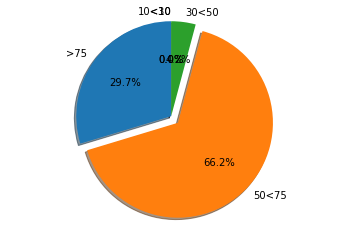

In [5]:
dfg= df
dfg["L_GROPS"] = ">75"
dfg.loc[dfg.L < 75, "L_GROPS"] = "50<75"
dfg.loc[dfg.L < 50, "L_GROPS"] = "30<50"
dfg.loc[dfg.L < 30, "L_GROPS"] = "10<30"
dfg.loc[dfg.L < 10, "L_GROPS"] = "<10"

import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = [">75","50<75","30<50","10<30","<10"]
sizes = [(100/2937)*sum(dfg.L_GROPS==">75"),(100/2937)*sum(dfg.L_GROPS=="50<75"),(100/2937)*sum(dfg.L_GROPS=="30<50"),(100/2937)*sum(dfg.L_GROPS=="10<30"),(100/2937)*sum(dfg.L_GROPS=="<10")]
explode = (0, 0.1, 0, 0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

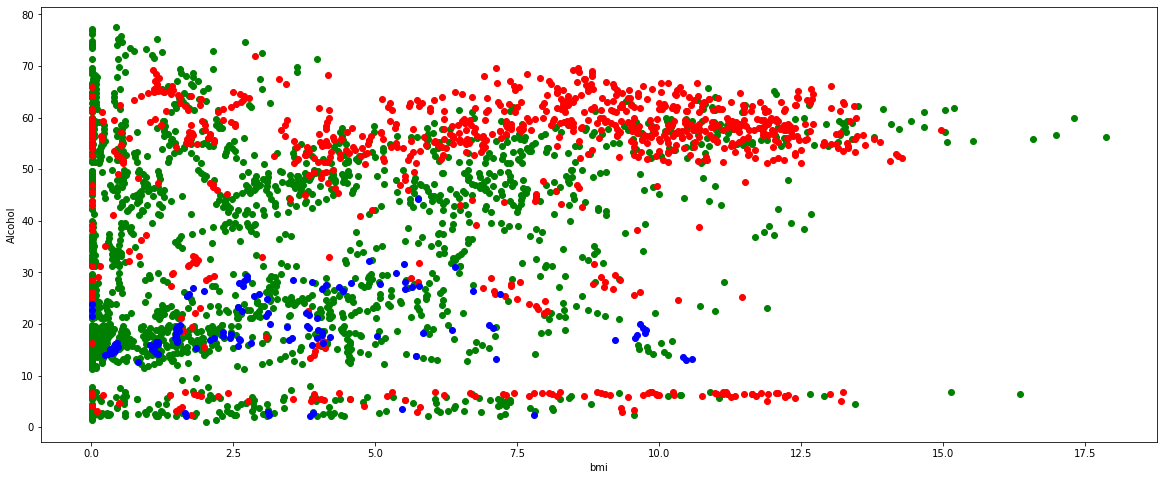

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.plot(dfg[dfg.L_GROPS=='50<75'].Alcohol,dfg[dfg.L_GROPS=='50<75'].bmi, 'go')
plt.plot(dfg[dfg.L_GROPS=='>75'].Alcohol,dfg[dfg.L_GROPS=='>75'].bmi, 'ro')
plt.plot(dfg[dfg.L_GROPS=='30<50'].Alcohol,dfg[dfg.L_GROPS=='30<50'].bmi, 'bo')
plt.xlabel("bmi")
plt.ylabel("Alcohol")
plt.show()

C:\Users\talia\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


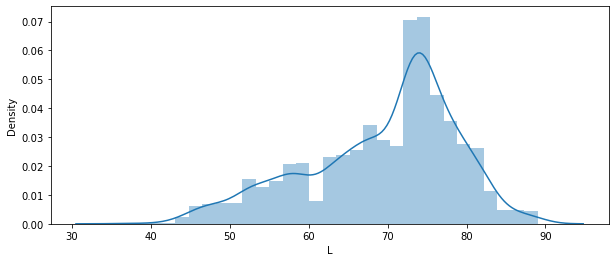

In [11]:
plt.figure(figsize=(10,4))
sns.distplot(df["L"]);

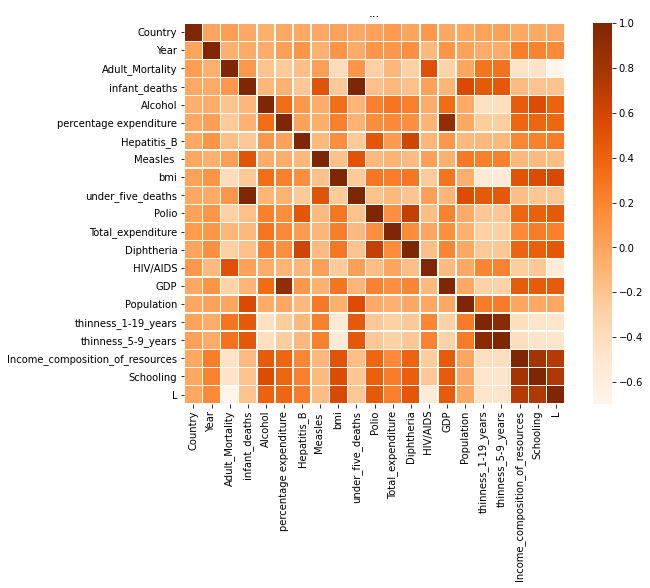

In [14]:
# improv
import seaborn as sns
plt.subplots(figsize=(10, 7))
sns.heatmap(df1.corr(), linewidths=0.4 , square=True, cmap = 'Oranges')
plt.title('...')
plt.show()

<AxesSubplot:xlabel='Year', ylabel='count'>

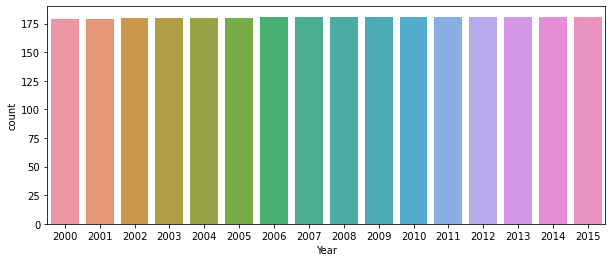

In [15]:
plt.figure(figsize=(10,4))

sns.countplot(data=df,x='Year')

<AxesSubplot:xlabel='Schooling', ylabel='Alcohol'>

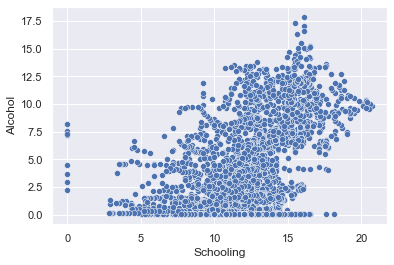

In [41]:
sns.scatterplot(x=df['Schooling'],y=df['Alcohol'])

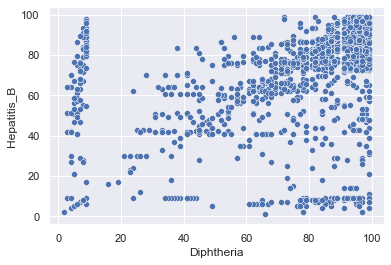

In [50]:
sns.scatterplot(x=df['Diphtheria'],y=df['Hepatitis_B']);

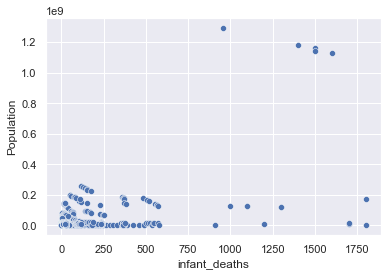

In [53]:
sns.scatterplot(x=df['infant_deaths'],y=df['Population']);

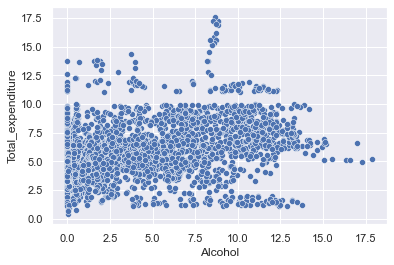

In [57]:
sns.scatterplot(x=df['Alcohol'],y=df['Total_expenditure']);

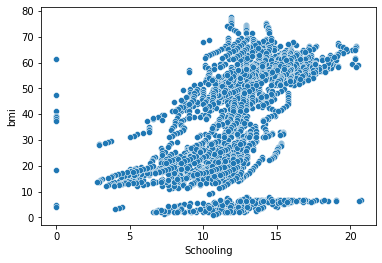

In [56]:
sns.scatterplot(x=df['Schooling'],y=df['bmi']);

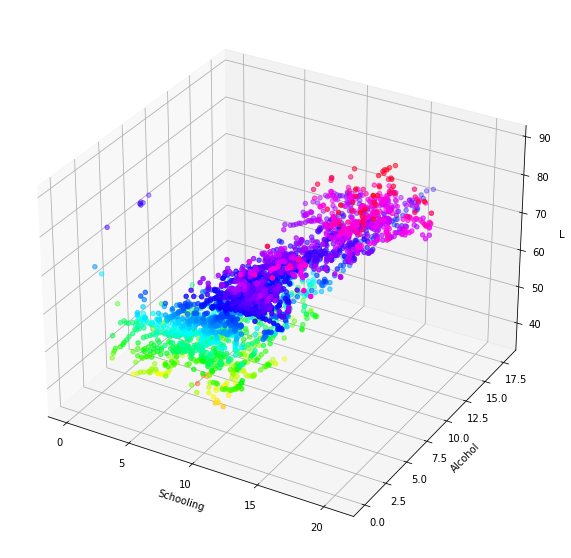

In [20]:

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")

z_points = df['L']
x_points = df['Schooling']
y_points = df['Alcohol']
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

ax.set_zlabel('L')
ax.set_xlabel('Schooling')
ax.set_ylabel('Alcohol')

plt.show()

modeling

In [70]:
# import models and Model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
df.drop("L_GROPS", axis=1, inplace=True)

In [71]:
# L= life expectancy
from sklearn.model_selection import train_test_split
x = df.drop('L', axis=1)
y = df.L
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print (x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(2021, 21) (867, 21)
(2021,) (867,)


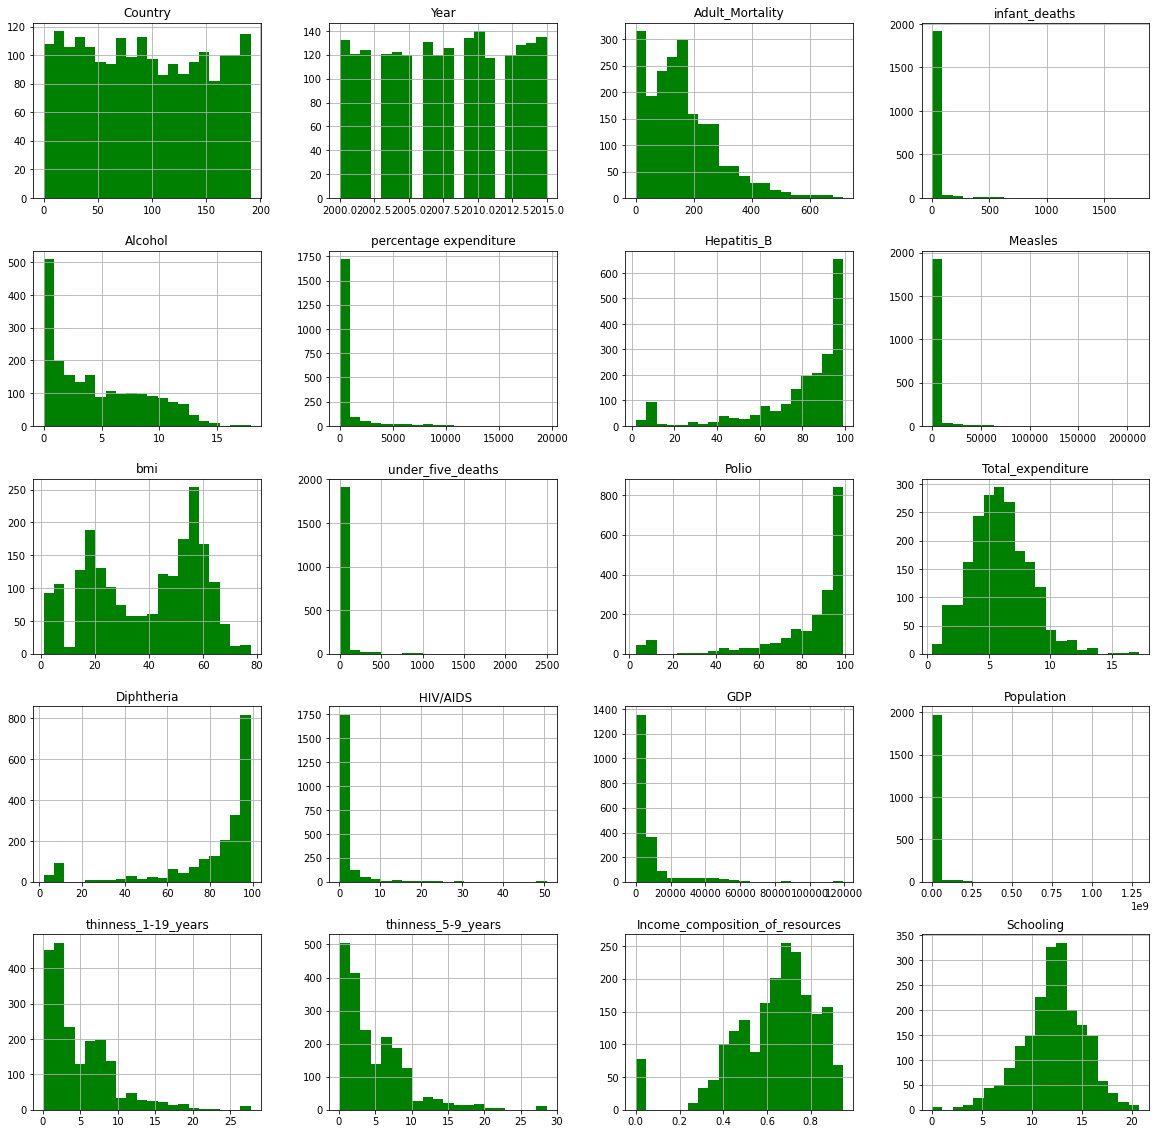

In [59]:
x_train.hist(figsize=(20,20),bins = 20, color="g")
plt.show()

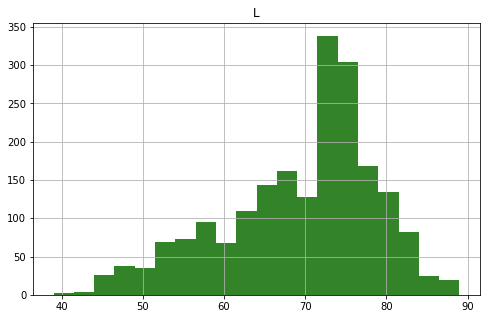

In [60]:
y_train.hist(figsize=(8,5),bins = 20, color="#127005DC")
plt.title("L")
plt.show()

DummyRegressor

In [72]:
from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor()
dummy_regr.fit(x_train, y_train)
DummyRegressor()
prediction= dummy_regr.predict(x_test)
dummy_regr.score(y_test, prediction)


1.0

The models

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [73]:

def calcAccuracy(regressionModels):
    
    # fit the model to the training data
    model = regressionModels().fit(x_train, y_train)
    # make predictions on the testing set
    y_pred = model.predict(x_test)
 
    modelsName = regressionModels.__name__
    
    print(modelsName,':')
    print("Accuracy (R2):", round(r2_score(y_test, y_pred)*100,2), "%")
    print("MAE:", round(mean_absolute_error(y_test, y_pred),4))
    print("MSE:", round(mean_squared_error(y_test, y_pred),4))
    print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)),4))
    print()
    return round(r2_score(y_test, y_pred), 4)


modelsPredictionComparison = pd.DataFrame(np.array(y_test) , columns=["Real Price"])
def DFofPreVal(regressionModels , modelsPredictionComparison):
    
    # fit the model to the training data
    model = regressionModels().fit(x_train, y_train)
    # make predictions on the testing set
    y_pred = model.predict(x_test)

    #add the prediction to the df
    modelsName = regressionModels.__name__
    modelsNameForDf=modelsName+" Predicted Price"
    return pd.DataFrame(y_pred , columns=[modelsNameForDf])



models = [LinearRegression,
          DecisionTreeRegressor, 
          KNeighborsRegressor]

results={}

best=0
bestModel="a"
for i in models:
    checkeBest = calcAccuracy(i)
    results[i.__name__]=checkeBest
    if (checkeBest>best):
        bestModel=i
        best=checkeBest

print("The best model is " ,bestModel.__name__, ", and the R2 score is " , round(best , 4) ,"=" ,round(best*100,2), "% .")

LinearRegression :
Accuracy (R2): 81.61 %
MAE: 3.0209
MSE: 16.2719
RMSE: 4.0338

DecisionTreeRegressor :
Accuracy (R2): 91.39 %
MAE: 1.6238
MSE: 7.6167
RMSE: 2.7598

KNeighborsRegressor :
Accuracy (R2): 9.31 %
MAE: 6.8626
MSE: 80.2594
RMSE: 8.9588

The best model is  DecisionTreeRegressor , and the R2 score is  0.9139 = 91.39 % .


improv:

normalization

In [74]:

from sklearn.preprocessing import StandardScaler
df_improve= df

not_scaled = df[['Country','Year','Status','L']]
df_improve.drop(['Country','Year','Status','L'], axis=1, inplace=True)
 
scaler = StandardScaler()
new_df = scaler.fit_transform(df_improve)
df_improve = pd.DataFrame(new_df, columns=df_improve.columns)

a=[]
for i in range (2888):
    b= [i]
    a=a+b
not_scaled['i']= a
df_improve['i']=a

df_improve= pd.merge(df_improve,not_scaled, how="outer", on="i")
df_improve.drop(['i'], axis=1, inplace=True)

<ipython-input-74-3ed0a23eebe4>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_scaled['i']= a


turning columns to dummies

In [76]:
df_improve = pd.get_dummies(df_improve, columns=['Country'])
df_improve = pd.get_dummies(df_improve, columns=['Year'])


run the models again:

In [78]:
# L= life expectancy
x = df_improve.drop('L', axis=1)
y = df_improve.L
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print (x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(2021, 216) (867, 216)
(2021,) (867,)


In [79]:

def calcAccuracy(regressionModels):
    
    # fit the model to the training data
    model = regressionModels().fit(x_train, y_train)
    # make predictions on the testing set
    y_pred = model.predict(x_test)
 
    modelsName = regressionModels.__name__
    
    print(modelsName,':')
    print("Accuracy (R2):", round(r2_score(y_test, y_pred)*100,2), "%")
    print("MAE:", round(mean_absolute_error(y_test, y_pred),4))
    print("MSE:", round(mean_squared_error(y_test, y_pred),4))
    print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)),4))
    print()
    return round(r2_score(y_test, y_pred), 4)


modelsPredictionComparison = pd.DataFrame(np.array(y_test) , columns=["Real Price"])
def DFofPreVal(regressionModels , modelsPredictionComparison):
    
    # fit the model to the training data
    model = regressionModels().fit(x_train, y_train)
    # make predictions on the testing set
    y_pred = model.predict(x_test)

    #add the prediction to the df
    modelsName = regressionModels.__name__
    modelsNameForDf=modelsName+" Predicted Price"
    return pd.DataFrame(y_pred , columns=[modelsNameForDf])



models = [LinearRegression,
          DecisionTreeRegressor, 
          KNeighborsRegressor]

results={}

best=0
bestModel="a"
for i in models:
    checkeBest = calcAccuracy(i)
    results[i.__name__]=checkeBest
    if (checkeBest>best):
        bestModel=i
        best=checkeBest

print("The best model is " ,bestModel.__name__, ", and the R2 score is " , round(best , 4) ,"=" ,round(best*100,2), "% .")

LinearRegression :
Accuracy (R2): 94.94 %
MAE: 1.2718
MSE: 4.6055
RMSE: 2.146

DecisionTreeRegressor :
Accuracy (R2): 91.91 %
MAE: 1.5761
MSE: 7.3554
RMSE: 2.7121

KNeighborsRegressor :
Accuracy (R2): 91.23 %
MAE: 1.8522
MSE: 7.9768
RMSE: 2.8243

The best model is  LinearRegression , and the R2 score is  0.9494 = 94.94 % .


the models did improv

the best model is LinearRegression 